# Preprocessing for Machine Learning
  	> In this tutorial, let's talk about some important preprocessing techniques to prepare the data for machine learning
* toc: true
* badges: true
* comments: true
* categories: [jupyter]
* image: images/preprocess_tutorial.jpg



In real life, the raw data recieved is rarely in the format which we can take and use direclty for our machine learning models. Therefore, some preprocessing is necessary to bring the data to the right format, select informative data or reduce its dimension to be able to extract the most out of the data. This is exactly what we are going to talk about in the next sections. First, let's start with encoding...

# Encoding Categorical Data

Numerical data, as the name suggests, has features with only numbers (integers or floating-point). On the other hand, categorical data has variables that contain label values (text) and not numerical values. Machine learning models can only accept numerical input variables. What happens if we have a dataset with categorical data instead of numerical data?

\begin{array}{|l|l|l|l|}
\hline
      & Gender & Height & City     \\ \hline
Alex  & male   & 180    & Miami    \\ \hline
Joe   & male   & 172    & Sydney   \\ \hline
Alice & female & 170    & New York \\ \hline
\end{array}

Then we have to convert the data which contains categorical variables to numbers before we can train a ML model. This is called encoding. Two most popular encoding techniques are Ordinal Encoding and One-Hot Encoding.



*   Ordinal Ecoding: This technique is used to encode categorical variables which habe a natural rank ordering. Ex. good, very good, excellent could be encoded as 1,2,3.
\begin{array}{|l|l|l|l|}
\hline
      & Rating & Encoded Rating     \\ \hline
Rater 1  & good   & 1       \\ \hline
Rater 2   & very good   & 2   \\ \hline
Rater 3 & excellent & 3  \\ \hline
\end{array}

*   One-Hot Encoding: This technique is used to encode categorical variables which do not have a natural rank ordering. Ex. Male or female do not have any ordering between them.
\begin{array}{|l|l|l|l|}
\hline
      & Gender & Male & Female     \\ \hline
Alex  & male   & 1    & 0       \\ \hline
Joe   & male   & 1    & 0    \\ \hline
Alice & female & 0    & 1    \\ \hline
\end{array}



## Ordinal Encoding

In this technique, each category is assigned an integer value. Ex. Miami is 1, Sydney is 2 and New York is 3. However, it is important to realise that this introduced an ordinality to the data which the ML models will try to use to look for relationships in the data. Therefore, using this data where no ordinal relatinship exists (ranking between the categorical variables) is not a good practice. Maybe as you may have realised already, the example we just used for the cities is actually not a good idea. Because Miami, Sydney and New York do not have any ranking relationship between them. In this case, One-Hot encoder would be a better option which we will see in the next section. Let's create a better example for ordinal encoding.

Ordinal encoding tranformation is available in the scikit-learn library. So let's use the OrdinalEncoder class to build a small example:

In [1]:
# example of a ordinal encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
# define data
data = np.asarray([['good'], ['very good'], ['excellent']])
df = pd.DataFrame(data, columns=["Rating"],  index=["Rater 1", "Rater 2", "Rater 3"])
print("Data before encoding:")
print(df)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df["Encoded Rating"] = encoder.fit_transform(df)
print("\nData after encoding:")
print(df)

Data before encoding:
            Rating
Rater 1       good
Rater 2  very good
Rater 3  excellent

Data after encoding:
            Rating  Encoded Rating
Rater 1       good             1.0
Rater 2  very good             2.0
Rater 3  excellent             0.0


In this case, the encoder assigned the integer values according to the alphabetical order which is the case for text variables. Although we usually do not need to explicitly define the order of the categories, as ML algorihms will be able to extract the relationship anyway, for the sake of this example we can define an explicit order of the categories using the categories variable of the OrdinalEncoder.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
# define data
data = np.asarray([['good'], ['very good'], ['excellent']])
df = pd.DataFrame(data, columns=["Rating"], index=["Rater 1", "Rater 2", "Rater 3"])
print("Data before encoding:")
print(df)
# define ordinal encoding
categories = [['good', 'very good', 'excellent']]
encoder = OrdinalEncoder(categories=categories)
# transform data
df["Encoded Rating"] = encoder.fit_transform(df)
print("\nData after encoding:")
print(df)

Data before encoding:
            Rating
Rater 1       good
Rater 2  very good
Rater 3  excellent

Data after encoding:
            Rating  Encoded Rating
Rater 1       good             0.0
Rater 2  very good             1.0
Rater 3  excellent             2.0


## Label Encoding
LabelEncoder class from scikit-learn is used to encode the Target labels in the dataset. It actually does exactly the same thing as OrdinalEncoder however expects only a one-dimensional input which comes in very handy when encoding the target labels in the dataset.

## One-Hot Encoding

Like we mentioned previously, for categorical data where there is no ordinal relationship, ordinal encoding is not the suitable technique because it results in making the model look for natural order relationships within the categorical data which does not actually exist which could worsen the model performance.

This is where the One-Hot encoding comes into play. This technique works by creating a new column for each unique categorical variable in the data and representing the presence of this category using a binary representation (0 or 1). Looking at the previous example:
\begin{array}{|l|l|l|l|}
\hline
      & Gender\\ \hline
Alex  & male  \\ \hline
Joe   & male \\ \hline
Alice & female \\ \hline
\end{array}
The simple table transforms to the following table where we have a new column repesenting each unique categorical variable (male and female) and a binary value to mark if it exists for that. 
\begin{array}{|l|l|l|l|}
\hline
      & Male & Female     \\ \hline
Alex  & 1    & 0       \\ \hline
Joe   & 1    & 0    \\ \hline
Alice & 0    & 1    \\ \hline
\end{array}



Just like OrdinalEncoder class, scikit-learn library also provides us with the OneHotEncoder class which we can use to encode categorical data. Let's use it to encode a simple example:

In [3]:
from sklearn.preprocessing import OneHotEncoder
# define data
data = np.asarray([['Miami'], ['Sydney'], ['New York']])
df = pd.DataFrame(data, columns=["City"], index=["Alex", "Joe", "Alice"])
print("Data before encoding:")
print(df)
# define onehot encoding
categories = [['Miami', 'Sydney', 'New York']]
encoder = OneHotEncoder(categories='auto', sparse=False)
# transform data
encoded_data = encoder.fit_transform(df)
#fit_transform method return an array, we should convert it to dataframe
df_encoded = pd.DataFrame(encoded_data, columns=encoder.categories_, index= df.index)
print("\nData after encoding:")
print(df_encoded)

Data before encoding:
           City
Alex      Miami
Joe      Sydney
Alice  New York

Data after encoding:
      Miami New York Sydney
Alex    1.0      0.0    0.0
Joe     0.0      0.0    1.0
Alice   0.0      1.0    0.0


As we can see the encoder generated a new column for each unique categorical variable and assigned 1 if it exists for that specific sample and 0 if it does not. This is a powerful method to encode non-ordinal categorical data. However, it also has its drawbacks... As you can imagine for dataset with many unique categorical variables, one-hot encoding would result in a huge dataset because each variable has to be represented by a new column. For example, if we had a column/feature with 10.000 unique categorical variables (high cardinality), one-hot encoding would result in 10.000 additional columns resulting in a very sparse matrix and huge increase in memory consumption and computational cost (which is also called the curse of dimensionality). For dealing with categorical features with high cardinality, we can use target encoding...



##Target Encoding

Target encoding or also called mean encoding is a technique where number of occurence of a categorical variable is taken into account along with the target variable to encode the categorical variables into numerical values. Basically, it is a process where we replace the categorical variable with the mean of the target variable. We can explain it better using a simple example dataset...

\begin{array}{|l|l|l|l|}
\hline
      & Fruit & Target     \\ \hline
0     & Apple    & 1       \\ \hline
1     & Banana    & 0    \\ \hline
2     & Banana    & 0    \\ \hline
3     & Tomato    & 0    \\ \hline
4     & Apple    & 1    \\ \hline
5     & Tomato    & 1    \\ \hline
6     & Apple    & 0    \\ \hline
7     & Banana    & 1    \\ \hline
8     & Tomato    & 0    \\ \hline
9     & Tomato    & 0    \\ \hline
\end{array}

Group the table for each categorical variable to calculated its probability for target = 1:
\begin{array}{|l|l|l|l|}
\hline
      & Category & Target=0 & Target=1 & Probability target=1     \\ \hline
0     & Apple    & 1        & 2        & 0.66                       \\ \hline
1     & Banana   & 2        & 1        & 0.33                      \\ \hline
2     & Tomato   & 3        & 1        & 0.25                       \\ \hline
\end{array}

Then we take these probabilites that we calculated for target=1, and use it to encode the given categorical variable in the dataset:
\begin{array}{|l|l|l|l|}
\hline
      & Fruit & Target & Encoded Fruit     \\ \hline
0     & Apple    & 1   & 0.66    \\ \hline
1     & Banana    & 0  & 0.33  \\ \hline
2     & Banana    & 0  & 0.33  \\ \hline
3     & Tomato    & 0  & 0.25  \\ \hline
4     & Apple    & 1   & 0.66  \\ \hline
5     & Tomato    & 1  & 0.25  \\ \hline
6     & Apple    & 0   & 0.66 \\ \hline
7     & Banana    & 1  & 0.33  \\ \hline
8     & Tomato    & 0  & 0.25  \\ \hline
9     & Tomato    & 0  & 0.25  \\ \hline
\end{array}

Similar to ordinal encoding and one-hot encoding, we can use the TargetEncoder class but this time we import it from category_encoders library:

!! if you get an error "No module named 'category_encoders'", uncomment and run the cell below to install the library in colab !!

In [4]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 723 kB/s 


In [5]:
from category_encoders import TargetEncoder
# define data
fruit = ["Apple", "Banana", "Banana", "Tomato", "Apple", "Tomato", "Apple", "Banana", "Tomato", "Tomato"]
target = [1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
df = pd.DataFrame(list(zip(fruit, target)), columns=["Fruit", "Target"])
print("Data before encoding:")
print(df)
# define target encoding
encoder = TargetEncoder(smoothing=0.1) #smoothing effect to balance categorical average vs prior.Higher value means stronger regularization.
# transform data
df["Fruit Encoded"] = encoder.fit_transform(df["Fruit"], df["Target"])
print("\nData after encoding:")
print(df)

Data before encoding:
    Fruit  Target
0   Apple       1
1  Banana       0
2  Banana       0
3  Tomato       0
4   Apple       1
5  Tomato       1
6   Apple       0
7  Banana       1
8  Tomato       0
9  Tomato       0

Data after encoding:
    Fruit  Target  Fruit Encoded
0   Apple       1       0.666667
1  Banana       0       0.333333
2  Banana       0       0.333333
3  Tomato       0       0.250000
4   Apple       1       0.666667
5  Tomato       1       0.250000
6   Apple       0       0.666667
7  Banana       1       0.333333
8  Tomato       0       0.250000
9  Tomato       0       0.250000


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


We have achieved the same table as what we have calculated manually ourselves...

**Advantages of target encoding**

Target encoding is a simple and fast technique and it does not add additional dimensionality to the dataset. Therefore, it is a good encoding method for dataset involving feature with high cardinality (unique categorical variables pof more than 10.000).

**Disadvantages of target encoding**

Target encoding makes use of the distribution of the target variable which can result in overfitting and data leakage. Data leakage in the sense that we are using the target classes to encode the feature may result in rendering the feature in a biased way. This is why there is the smoothing parameter while initializing the class. This parameter helps us reduce this problem (in our example above, we deliberately set it to a very small value to achieve the same results as our hand calculation).


# Feature Scaling

Feature scaling is a technique to standardize the feature in the dataset on a limited range. Some machine learning algorithms require features to be scaled in the preprocessing stage because they tend to miscalculate the feature importances due to the magnitude differences in the features which actually have different units. 

**Example:** considering two features where one has values in cm and the other in mm, from the view of the ML algorithm 10 cm would be same as 10 mm  because it can not consider the unit differences. Therefore, it is necessary to standardize these feature by rendering them unitless. There are two important methods to do this:


*   **Min-max normalization:** This method is used to rescale the feature values between 0 - 1.
$$ X_i' = \frac{X_i - X_{min}}{X_{max} - X_{min}} $$
*   **Standardization:** Standardization is a method where feature values are scaled in a way that the values are centered around the mean with a unit standard deviation meaning the mean of the attribute is zero and its distribution has a deviation of 1 (unit standard deviation).
$$ X_i' = \frac{X_i - X_{mean}}{Standard deviation} $$

Where Xmean and standard deviation are calculated using all the values in the feature column.
$$ X_{mean} = \frac{1}{N}\sum\limits_{i=1}^{N}{X_i} $$
$$ Standard deviation = σ = \sqrt{\frac{1}{N}\sum\limits_{i=1}^{N}{(X_i - X_{mean}})^2 } $$

We can create a small and simple dataset example and have a look at feature scaling in detail...

In [6]:
df = pd.DataFrame([[2000, 5.6], [15000, 10.0], [7000, 6.9], [2500, 5.3], [4000, 12.4]],
                       columns=['Distance travelled', 'average fuel consump.'])
df

,Distance travelled,average fuel consump.
0,2000,5.6
1,15000,10.0
2,7000,6.9
3,2500,5.3
4,4000,12.4


We can see that the values under the column 'Distance travelled' are much larger than the values under 'average fuel consumption' since they represent different units. Ex. A linear regression model would weight the distance travelled column much larger compared to the other column although we do not know if 'Distance travelled' feature is more important than the other one... This is why feature scaling is important for some ML algorithms which use gradient decent (Linear and logistic regression, Neural Networks) and the ML algorithms which are distance based (KNN, K-means, SVM) because these algorithms are pretty sensitive to the range of the values of data points. It is not really necessary to scale the features when we are used tree based algorithms. We are going to touch up on this more as we are learning more about different ML models in the following sections. 

Now let's have a look at how we can apply min-max normalization or standardization to this data set to scale the values...


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame()
df_normalized[df.columns] = scaler.fit_transform(df)

df_normalized

,Distance travelled,average fuel consump.
0,0.000000,0.042254
1,1.000000,0.661972
2,0.384615,0.225352
3,0.038462,0.000000
4,0.153846,1.000000


All the features now have a minimum value of 0 and a maximum value of 1. 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame()
df_standardized[df.columns] = scaler.fit_transform(df)

df_standardized

,Distance travelled,average fuel consump.
0,-0.857898,-0.889634
1,1.862267,0.714624
2,0.188319,-0.415649
3,-0.753277,-0.999016
4,-0.439411,1.589675


All the features are now centered on the mean with a unit standard deviation

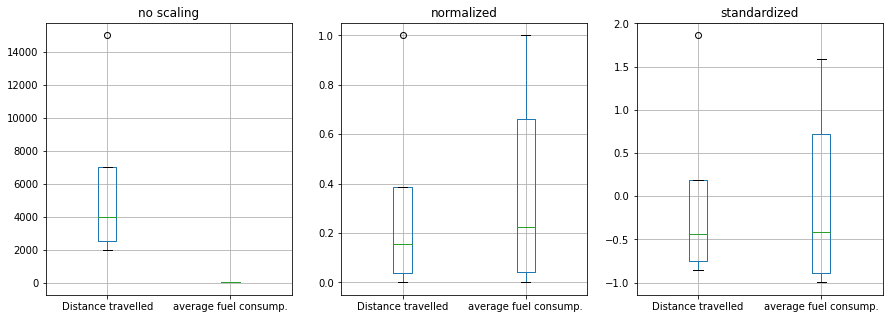

In [9]:
import matplotlib.pyplot as plt
titles = ['no scaling', 'normalized', 'standardized']
fig, axes = plt.subplots(1,3,figsize=(15,5)) # create figure and axes
for i,data in enumerate([df, df_normalized, df_standardized]):
  data.boxplot(ax=axes.flatten()[i])
  axes[i].title.set_text(titles[i])

Notice how the two features with no scaling are not comparable at all. After scaling, for both normalization and standardization, the features become much comparable and the large differences in magnitude will not be effecting the ML algorithms anymore.

## Normalization or Standardization?
The answer to this question depends very much on the type of data, variance in the data and the ML algorithm being used. However, there are some things which we can consider while deciding to use standardization or normalization. If the distrubution of a feature is normal, then it should be standardized. Otherwise, it should be normalized.



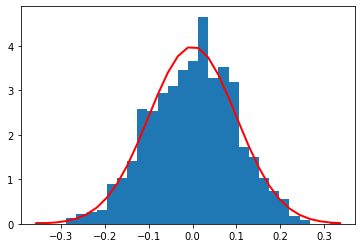

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Standard scaler assumes that the features of the dataset are normally distributed. Therefore, it will scale the values of the feature to a mean of zero and a standard deviation of one. If we know that the feature values have a normal distribution, standardizing the data is a much better option than normalizing. When we are dealing with variance in the data, standardization using standard scaling would be very important.

Normalization is a better option when we are not necessarily dealing with a normally distirbuted data and we are not worried about standardization along the variance axes (image processing or neural network expecting values between 0-1).

How to check if the data has a normal distribution? Just plot the data from the feature using a Histogram diagram and look for a distribution similar to above. If some features have normal distributions and some now, then it is best to apply standardization to feature with normal distribution and normalization to the other features. So please consider all the features in a data seperately while making your decision to which to use ;)

(array([2., 1., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 2000.,  3300.,  4600.,  5900.,  7200.,  8500.,  9800., 11100.,
        12400., 13700., 15000.]),
 <a list of 10 Patch objects>)

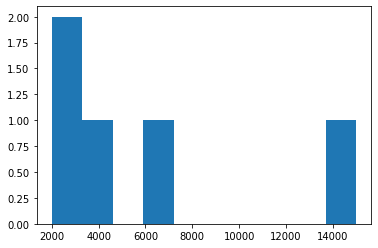

In [11]:
plt.hist(df["Distance travelled"])

# Feature Selection

Feature selection is done to reduce the number of input variables while developing an ML model. You may be thinking, why do we want to reduce the number of input variables (features) when we can use them all?

It is important to reduce the number of features to reduce the computational cost of training a model. Sometimes, it can even help our model achieve a better performance, because getting rid of some not important features allows it to focus on other more informative features, hence increase model performance. So the idea is: reduce the number of features to those that are most useful to a model to predict a target variable.

There are different types of feature selection methods for supervised learning and unsupervised learning methods. For now, we are going to focus on feature selection methods for supervised learning where we use the target variable while selecting features.
![Overview of Feature Selection Methods](https://drive.google.com/uc?export=view&id=1hoJLCHks14FxOkwLpmkyK-3NkTDgnz65)




Filter methods mostly make use of statistical methods to calculate the importance/correlation of an input variable with respect to the target variable. This type of statistical methods are called univariate methods. The decision of which statistical method depends on the data types the input and output variables contain. 

## Filter Methods

### Numerical Input Variable - Numerical Output Variable
In this case we have a regression problem where we have numerical input variables. The mostly used methods are correlation based methods:

*   **Pearson's correlation coefficient:** 
This is a statistic which measures the linear correlation between two variables (input variable, x and output variable, y). It's value ranges from +1 to -1, where positive value means a positive correlation and a negative value, negative correlation. 0 indicates no linear connection between the two variables. 
$$ r = \frac{Covariance(x,y)}{σ_x σ_y}$$
$$ r = \frac{\sum\limits_{i=1}^{N}{(x_i - x_{mean})(y_i - y_{mean})}}{\sqrt{\sum\limits_{i=1}^{N}{(x_i - x_{mean})^2 \sum\limits_{i=1}^{N}{(y_i - y_{mean})^2}}}}$$
*   **Spearman's rank coefficient**: This is a statistical measure which measures the amount of monotonic relationship between two variables (input and output variables). It's value also ranges from +1 to -1 and its interpretation is similar to pearson's correlation (closer to +/-1, stronger the correlation between two variables). In comparison to Pearson's correlation, it works by calculating the Pearson's correlation on the ranked values of the data. It is a nonparametric statistic and best measures the monotonic relationship which means it can capture non-linear correlation between two variables. Due to the fact that it uses ranking, it can also be used for ordinal categorical data in combination with numerical data. Kendall's Rank Correlation could also be used as an alternative to this for (Ordinal categorical variable - numerical variable).






We can use the f_regression() method from scikit-learn library, which calculates the person's correlation (r_regression() method ) for two variables and converts it to an F-score and then to a p-value.

In [12]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston_data = load_boston()
df = pd.DataFrame(data= boston_data.data,
                  columns= boston_data.feature_names)

# adding the target variable
df["target"] = boston_data.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# Pearson correlation coefficient
corr = df.corr(method='pearson')["target"].sort_values(ascending=False)[1:] #method can be pearson, kendall, spearman

# random threshold for features to keep
relevant_features = corr[abs(corr)>0.4]
relevant_features

RM         0.695360
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

Or using the r_regression function from scikit-learn library (it normally makes sense to use f_regression, because it provides f scores and p values, but we use r_regression to be able to compare):

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
features = SelectKBest(score_func=r_regression, k=6)

# apply feature selection
features.fit(df.drop(["target"], axis=1), df["target"])
for i,score in enumerate(features.scores_):
  if abs(score) > 0.4:
    print(df.columns[i], round(score,6))
    
                    

INDUS -0.483725
NOX -0.427321
RM 0.69536
TAX -0.468536
PTRATIO -0.507787
LSTAT -0.737663


### Numerical Input Variable - Categorical Output Variable

In this case we are talking about a classification problem where we have numerical input variables. The mostly used methods are in this case also correlation based methods:


*   **ANOVA (Analysis of Variance) correlation coefficient**: This technique is a measure of variance between groups of categorical variable with respect to the numerical variable. It does this by using the F-tests.

$$ F = \frac{\text{between-group variability}}{\text{within-group variability}}$$

To read more about F-tests: [F-test on wikipedia](https://en.wikipedia.org/wiki/F-test)

A nice blog post about detailed calculation of ANOVA: [Bog post about NOVA](https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0)

The good old Scikit-learn library also provides us with a method which allows us to use ANOVA correlation coefficient, f_classif(). We can plug in this method to the SelectKBest() method from earlier. The iris dataset from sklearn is a good example which we can use, because it has numerical input variables (features) and categorical output variable (target).

In [15]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif

iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"] = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
anova = SelectKBest(f_classif, k=2)
array_selected = anova.fit_transform(df.drop(["target"], axis=1), df["target"])
df_selected = pd.DataFrame(array_selected, columns=anova.get_feature_names_out(df.columns[:-1]))
df_selected.head()



,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
anova.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

### Categorical Input Variable - Categorical Output Variable
In this case we have a classification problem since we have categorical data as output, but we have also categorical variables as the input variables. The mostly used methods are:




*   **Chi-square test:** Nominal categorical variables contain labels/values that have no intrinsic ordering (Ex. Male/Female, Dog/Cat/Bird etc.). Chi-square test works by comparing the observed values in the data to the expected values to see if there is a correlation between the variables. There are two types of chi-square tests: **Chi-square goodness of fit test** (to test if a variable comes from a certain distribution) and **Chi-square test of independence** (to test if two variables are correlated). We are going to check for correlation between two variables while feature selection, so we will be using the second one.
$$ χ^2 = \sum\limits_{i=1}^{N}{\frac{(O_i - E_i)^2}{E_i}}$$
where,

$E_i $= number of expected observations in class i

$O_i $= number of observations in class

[More information about the chi-square test](https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test.html)



In [18]:
df=pd.read_csv("http://bit.ly/kaggletrain").drop(["Name","Sex","Ticket","Cabin", "Embarked"], axis=1).dropna()
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [19]:
from sklearn.feature_selection import chi2

fs = SelectKBest(chi2, k=3)
array_selected = fs.fit_transform(df.drop(["Survived"], axis=1), df["Survived"])
df_selected = pd.DataFrame(array_selected, columns=fs.get_feature_names_out(list(df.columns).remove("Survived")))
df_selected.head()

,PassengerId,Age,Fare
0,1.0,22.0,7.2500
1,2.0,38.0,71.2833
2,3.0,26.0,7.9250
3,4.0,35.0,53.1000
4,5.0,35.0,8.0500


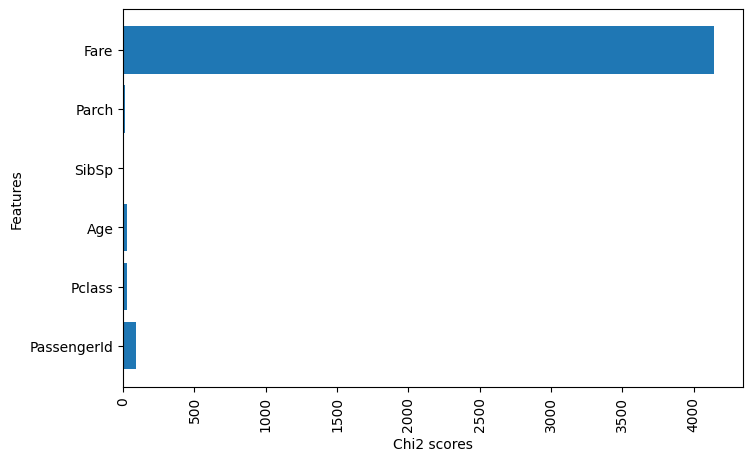

In [20]:
import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(8, 5))
plt.barh(df.drop(["Survived"], axis=1).columns,fs.scores_)
plt.ylabel('Features')
plt.xlabel('Chi2 scores')
plt.xticks(rotation='vertical')
plt.show()

### Mutual Information

Mutual information is a pretty powerful method which can actually be used for both numerical and categorical data.

Mutual information is very similar to to correlation methods in the sense that it also measures the relationship between two variables. However, there is an important catch to mutual information, it can detect also non-linear relationships unlike most correlation methods. Mutual Information can also detect dependencies that do not depend on covariance. Mutual information detects relationships between variables using uncertainty. MI is way to measure how much information from one variable reduces the uncertainty about the other variable. Uncertainty is measured using the information theory, entropy. A high MI value means a large reduction in uncertainty whereas a low MI means a small reduction. A value of zero for MI, means that the variables are not correlated.

The MI formula for two discrete variables:
$$
I(X ; Y)=\sum_{y \in Y} \sum_{x \in X} p_{(X, Y)}(x, y) \cdot \log \left(\frac{p_{(X, Y)}(x, y)}{p_{X}(x) p_{Y}(y)}\right)
$$
The MI formula for two continous variables (replace sums by integrals):
$$
I(X ; Y)=\int_{Y} \int_{X} p_{(X, Y)}(x, y) \cdot \log \left(\frac{p_{(X, Y)}(x, y)}{\left.p_{X}(x) p_{Y}(y)\right)}\right) d x d y
$$
[More information about Mutual Information](https://quantdare.com/what-is-mutual-information/)

The scikit-learn library provides us two methods for mutual information: 
*  **mutual_info_classif():** method to estimate mutual information for a discrete(categorical) target variable. 
*  **mutual_info_regression():** method to estimate mutual information for a continuous(numerical) target variable.

We can use the cancer dataset from sklearn. It provides us with numerical input variables and categorical output variable. In this case, we can make use of the mutual_info_classif() method:

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
#Option 1: we can calculated the MI scores and perform feature selection directly using SelectKBest() method like before
fs = SelectKBest(mutual_info_classif, k=5)
array_selected = fs.fit_transform(df.drop(["target"], axis=1), df["target"])
df_selected = pd.DataFrame(array_selected, columns=fs.get_feature_names_out(df.columns[:-1]))
df_selected.head()

,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,0.14710,25.38,184.60,2019.0,0.2654
1,0.07017,24.99,158.80,1956.0,0.1860
2,0.12790,23.57,152.50,1709.0,0.2430
3,0.10520,14.91,98.87,567.7,0.2575
4,0.10430,22.54,152.20,1575.0,0.1625


In [23]:
3#Option 2: We can only calculated the MI scores using directly the mutual_info_classif() method
# In this case, if we have a combination of categorical and numerical input variables, we can define the categorical variables
# using the discrete_features variable
mi = mutual_info_classif(X = df.drop(["target"], axis=1), y = df["target"], discrete_features = False) #discrete_features{‘auto’, bool, array-like}, default=’auto’
mi_scores = pd.Series(mi, name="MI Scores", index=df.columns[:-1]).sort_values(ascending = False)
mi_scores

worst perimeter            0.475424
worst area                 0.462624
worst radius               0.452039
mean concave points        0.440509
worst concave points       0.438191
mean perimeter             0.402248
mean concavity             0.373963
mean radius                0.366718
mean area                  0.361620
area error                 0.338804
worst concavity            0.316218
perimeter error            0.278131
radius error               0.247885
worst compactness          0.224756
mean compactness           0.213011
concave points error       0.127263
worst texture              0.120270
concavity error            0.116737
worst smoothness           0.098041
worst symmetry             0.094085
mean texture               0.092694
compactness error          0.075680
mean smoothness            0.072768
worst fractal dimension    0.067039
mean symmetry              0.061712
fractal dimension error    0.037551
smoothness error           0.014719
symmetry error             0

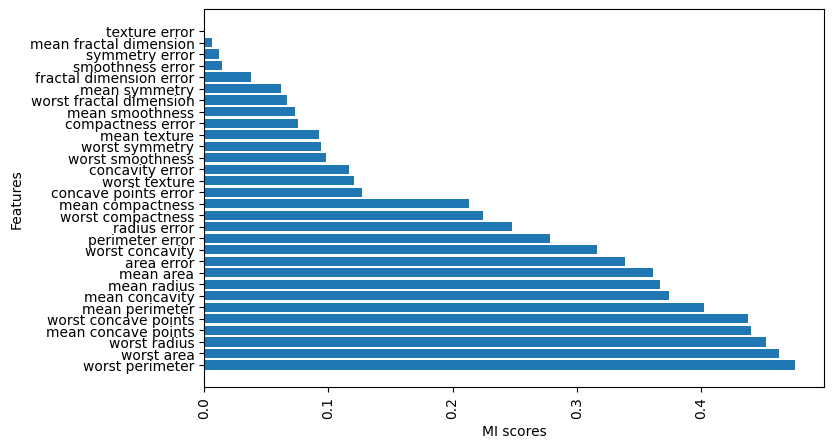

In [24]:
import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(8, 5))
plt.barh(mi_scores.index,mi_scores.values) #we can also get the scores using the fs variable from previous step: fs.scores_
plt.ylabel('Features')
plt.xlabel('MI scores')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
features = mi_scores.index[:5]
df[features]

,worst perimeter,worst area,worst radius,mean concave points,worst concave points
0,184.60,2019.0,25.380,0.14710,0.2654
1,158.80,1956.0,24.990,0.07017,0.1860
2,152.50,1709.0,23.570,0.12790,0.2430
3,98.87,567.7,14.910,0.10520,0.2575
4,152.20,1575.0,22.540,0.10430,0.1625
...,...,...,...,...,...
564,166.10,2027.0,25.450,0.13890,0.2216
565,155.00,1731.0,23.690,0.09791,0.1628
566,126.70,1124.0,18.980,0.05302,0.1418
567,184.60,1821.0,25.740,0.15200,0.2650


### Overview of Methods

\begin{array}{|l|l|l|l|}
\hline
Variable 1 & Variable 2 & Method     \\ \hline
Numerical   & Numerical    & \text{Pearson's Correlation}\\ \hline
Numerical   &  Categorical Ordinal    &  \text{Spearman's Rank Correlation}  \\ \hline
Numerical & Categorical    &  \text{ANOVA} \\ \hline
Categorical & Categorical    &  \text{Chi-square} \\ \hline
Categorical/Numerical & Categorical/Numerical    &  \text{Mutual Information} \\ \hline
\end{array}

## Wrapper Methods

In wrapper methods, the feature selection process is based on trying a subset of variables in the dataset against the target variable using a ML model.

The process consists of evaluating all possible combinations of input variables against the target variable. Unlike filter methods, where statistical methods are used, the evaluation criteria is not a statistical term but how the model actually performs (R-squared, accuracy etc.). The method selects the combination of the input variables which yield the best performance according to some evaluation metric. Methods which try to find the optimal combination for similar problems are called greedy algorithms.







### RFE - Recursive Feature Elimination
One very popular wrapper method is RFE. The name already gives us a hint how it works. It works by recursively removing variables(features when we talk about a ML model) and then trains a specific/selected ML model with the remaining input variables and selects the combination with the best performance according to a specific evaluation metric. We are not going to go into detail because we have not discussed about ML models and evaluation metrics. However, we will do a small example just to have an idea of how it is implemented.

**Advantages**

Able to detect the interactions that take place between 

*   It is able to pick up the relationships between features (not univariate like filter methods)
*   Often performs better than filter methods in terms of predictive accuracy
*   Obtains an optimal feature subset

**Disadvantages**

*   Due to multiple model trainings to evaluate different subsets, computational cost is much higher
*   It is prone to overfitting

Let's continue by using the cancer dataset which we already imported as a DataFrame in the previous section.

In [26]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We can use the RFE class from the scikit-learn library and a simple ML model: LinearRegression. 

In [27]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# X are the input variables/features and y is the output variable
X = df.drop("target", axis= 1)
y = df["target"]

# Instantiate the LinearRegression model
model = DecisionTreeClassifier()

# Instantiate the RFE object to perform feature selection using the Linear Regression model
rfe = RFE(estimator=model, n_features_to_select=5) # let's select the 5 most important features/variables
rfe.fit(X, y)


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [28]:
#List the selected features in the same order as their rank(importance)
features = [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1] #selected features are assigned rank 1
for feature in features: 
  print(feature)

perimeter error
worst radius
worst texture
worst area
worst concave points


Using RFE, we have obtained features which are pretty similar but with one different feature compared to the features we obtained using Mutual Information. The reason is that we are selecting the features solely based up on the performance of an ML model. Therefore, different ML models are likely to yield different features depending on how they perform on the data.

This also shows us that there is no one perfect method while performing feature selection, but it is very much dependent on the problem and the data. Therefore, it makes sense to evaluate different methods while performing feature selection.

## Intrinsic/Embedded Methods

Intrinsic/embedded methods, are pretty similar to wrapper methods since they are also used to optimize the performance of a learning algorithm / model. The difference to wrapper methods is that an intrinsic model building metric is used during learning.  For this reason, Intrinsic methods need a supervised learning model, to intrinsically determine the importance of each input variable/feature for predicting the output variable /target.

The model used for the feature selection process does not necessarily have to be the same as the model that is going to be used for predictive modelling.




LASSO (Least Absolute Shrinkage and Selection Operator) is a popular method and a good example for an intrinsic method. In Wikipedia Lasso is described as; “a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.” 

Due to the nature of the Intrinsic model, we do not explicitly perform feature selection but the model performs a feature selection during the training. Since Lasso is a regression model, we should be using it with a dataset for regression purposes (target has continous output variable) to obtain the best results. We can use the diabetes dataset from scikit-learn library

In [29]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True, as_frame=True)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [30]:
from sklearn.linear_model import Lasso

#instantiate the model and train using the data
lasso = Lasso()
lasso.fit(X,y)

#we can use the coef_ attribute the see the selected features and their coefficients
features = [(feature, coef) for feature, coef in zip(X.columns.values, lasso.coef_) if coef != 0]
for feature,coef in features:
  print(feature, round(coef,2))

bmi 367.7
bp 6.3
s5 307.61




```
# This is formatted as code
```

# Principal Component Analysis - PCA

In previous section, we were looking into methods to use to do feature selection where we reduce the variables (feature space) by eliminating not very important variables/features. This results in losing all the information brought by these variables which may be valuable (less compared to others but still valuable). This is where feature extraction comes into play.

Principal Component Analysis (PCA) is a feature extraction method used to reduce the dimensionality of large data sets. The idea is to transfor a dataset with large set of variables to smaller set of variables while keeping the information from the large set of variables as much as possible. The aim of dimensional reduction is to reduce complexity of the data while keeping the information loss at an acceptable level (Tradeoff -> simplicity of accuracy).

PCA combines the variables in the dataset to form new variables. PCA does this by describing the data with initial variables by the axes of variation to create new variables. This way the axes of variation of the initial variables become the new variables. 



In [31]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Before we perform PCA, it is necessary to standardize the data. It makes sure that each variables contribution and variation if considered properly independent from the magnitude differences between variables.

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, index=X.index, columns=X.columns)

In [33]:
X_scaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


We can use the diabetes dataset again to explain the concept. Let us select the variables s1 and s2 of the diabetes dataset as variable 1 and variable 2.

In [34]:
var_1 = X_scaled["s1"]
var_2 = X_scaled["s2"]

In [35]:
m, b = np.polyfit(var_1, var_2 , 1)
m,b

(0.8966629578104899, -3.300495253172984e-17)

(-4.0, 4.0)

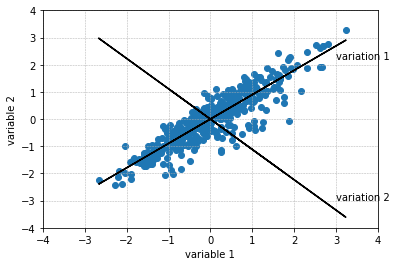

In [36]:
import matplotlib.pyplot as plt
plt.scatter(var_1, var_2)
plt.plot(var_1, m*var_1 + b, 'k', label="PC 1" )
plt.plot(var_1, (-1/m)*var_1 + b, 'k', label = "PC 2" )
plt.xlabel("variable 1")
plt.ylabel("variable 2")
plt.text(3,2.2, 'variation 1')
plt.text(3, -3, 'variation 2')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlim((-4,4))
plt.ylim((-4,4))

When we plot the variable 1 against variable 2, we can clearly see the two axes of variations in this 2D plot. There is ofcourse the variation of the data in variable 1 axis, and then also the variation of the data in variable 2 axis. We can then draw a line along these axes of variations. This would mean that we have one axis of variation of each original feature/variable.

Notice that we can now describe the data using the axes of variation of the original variables and not the variables themselves. This is actually the whole idea behind PCA.

These axes of variations are now our new variables/features and they are the so-called "principle components" of the two variables. There are as many principal components as the original number of variables in the dataset because each component describes the variation of respective feature space / variable. Since we originally have 10 features in the diabetes data, then we would expect also two have 10 principle components for this data.





(-4.0, 4.0)

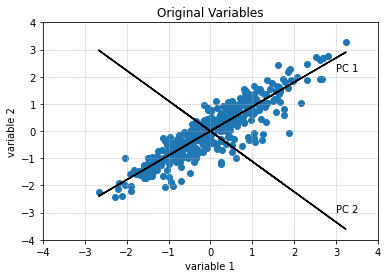

In [37]:
import matplotlib.pyplot as plt
plt.scatter(var_1, var_2)
plt.plot(var_1, m*var_1 + b, 'k', label="PC 1" )
plt.plot(var_1, (-1/m)*var_1 + b, 'k', label = "PC 2" )
plt.xlabel("variable 1")
plt.ylabel("variable 2")
plt.text(3,2.2, 'PC 1')
plt.text(3, -3, 'PC 2')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.title("Original Variables")
plt.xlim((-4,4))
plt.ylim((-4,4))

In [38]:
new_var_1 = m*X_scaled["s1"] + m*X_scaled["s2"]

In [39]:
new_var_2 = m*X_scaled["s1"] - m*X_scaled["s2"]

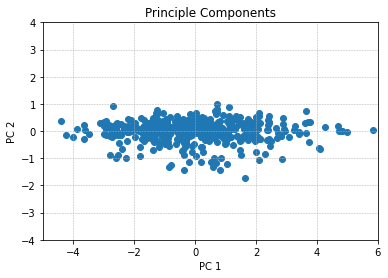

In [40]:
plt.scatter(new_var_1, -new_var_2)
plt.xlim((-5,6))
plt.ylim((-4,4))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Principle Components")
plt.grid(linestyle = '--', linewidth = 0.5)

We rotate the dataset in the feature space, so that the Principle Components become the new features (Principles components become the new axes).

How do we calculate the new features using these principle components? We just said that we rotate the data in the feature space, this means the new features are actually a linear combination of the original features. This is done by using weights/ratios which are called **loadings**. The loadings also give us a hint about the variation of data with regards to PC through its sign.

In [41]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
new_var = pca.fit_transform(X_scaled[["s1", "s2"]])

In [42]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=["s1", "s2"])

In [43]:
loadings

,PC1,PC2
s1,0.707107,0.707107
s2,0.707107,-0.707107


We can see in PC 1 space, s1 and s2 vary in the same direction and contribute the same to PC1 since they are both positive and equal, but in PC2 space they vary in opposite directions. 

We can also see the amount of variation in each PC.  This is called the explained variance. We can plot the percentage of explained variance below.

There is much more variation in the data along PC1 axis compared to PC2. PC1 is able to capture the most of variance introduced by s1 and s2 in this case. However, keep in mind that large variance in a PC does not necessarily indicate that it is a valuable feature, it depends on the target variable as well.


In [44]:
pca.explained_variance_ratio_


array([0.94833148, 0.05166852])

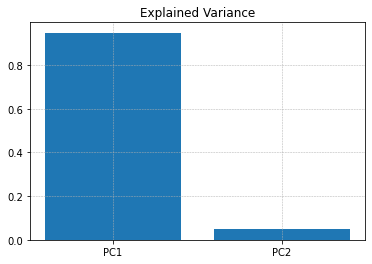

In [45]:
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_)
plt.title("Explained Variance")
plt.grid(linestyle = '--', linewidth = 0.5)

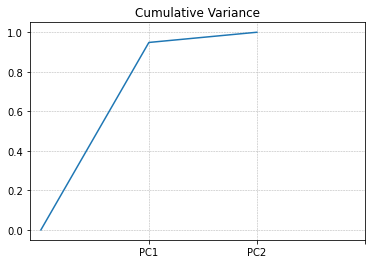

In [46]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var = np.insert(cum_var,0,0)

plt.plot(cum_var)
positions = (1, 2, 3)
labels = ("PC1", "PC2")
plt.xticks(positions, labels)
plt.title("Cumulative Variance")
plt.grid(linestyle = '--', linewidth = 0.5)

PCA can be useful in two ways:


*   **As a descriptive method:** The principal components give us an idea about variation. However, it does not directly mean that alrge variation is important. We can compute the MI scores for the principal components to see which variation is most useful for the prediction. Looking at which PC is more important for the predictive performance, we can create new features to represent this principal component space.
*  **Use Principal Components as features:** We can also use the principal components directly as features since they contain alot of information about the variation of the data. In some cases, this variation of data can be much more informative than the original features themselves.




## Some Use Cases


*  **Dimensionality Reduction:** When there exists highly unessential features/variables, PCA will transform these feature into close-to-zero components, which can then be dropped because they contain very little information. This helps reduce the dimensionality of the dataset.

*   **Anomaly Detection**: Unusual variation in the data can be visible in the principal components when they are not really visible in the original data. These unusual variations often are visible in low-variance components. The components with unusual variation can be effective used in anomaly detection problems or to find outliers
*   **Decorrelation:** Highly correlated features/variables in data can sometime cause problems with ML algorithms. PCA converts correlated variables into uncorrelated principal components which can help the ML algorithm obtain a better performance.

**Do not forget:**


*   PCA requires scaling of the data. Standardize the data before applying PCA.
*   Outliers can have an unwanted influence on the result since they effect the variance of the data. Try to remove outliers if possible.
*   PCA only works with continues variables/features (numeric data).




